### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Loading csv files into dataframes

In [2]:
df_lst = []
files = glob.glob('states*')
for filename in files:
    df = pd.read_csv(filename)
    df_lst.append(df)

us_census = pd.concat(df_lst).reset_index(drop = True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [3]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.3+ KB


### Converting Income column to numeric dtype

In [4]:
us_census.Income = us_census.Income.replace('\$', '', regex = True)
us_census.Income = pd.to_numeric(us_census.Income)
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.3+ KB


### Separate GenerPop into two columns; Men and Women both of numeric dtype

In [5]:
split_pop = us_census.GenderPop.str.split('_')
us_census['Men'] = split_pop.str.get(0)
us_census['Women'] = split_pop.str.get(1)

us_census.Men = us_census.Men.str[:-1]
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = us_census.Women.str[:-1]
us_census.Women = pd.to_numeric(us_census.Women)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


In [6]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     int64  
 12  Women       57 non-null     float64
dtypes: float64(2), int64(3), object(8)
memory usage: 6.2+ KB


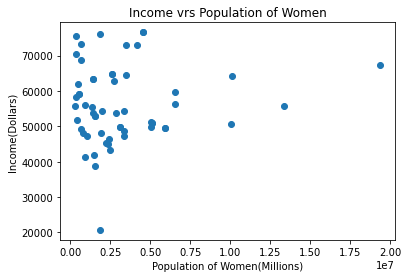

In [7]:
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Population of Women(Millions)')
plt.ylabel('Income(Dollars)')
plt.title('Income vrs Population of Women')
plt.show()

### Checking and filling null values in Women column

In [8]:
us_census.Women.isnull().sum()

3

In [9]:
us_census.Women = us_census.Women.fillna(value = us_census.TotalPop - us_census.Men)
us_census.Women.isnull().sum()

0

### Checking and drop duplicates if any

In [10]:
us_census.duplicated()
us_census = us_census.drop_duplicates()

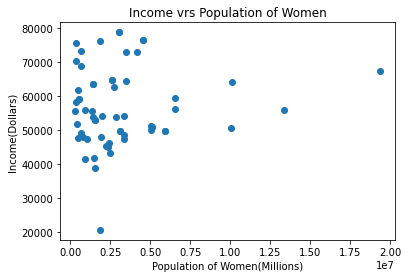

In [11]:
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Population of Women(Millions)')
plt.ylabel('Income(Dollars)')
plt.title('Income vrs Population of Women')
plt.show()

### Tidying up Race columns 

In [12]:
race_columns = us_census.columns[3:9]
for race in race_columns:
    us_census[race] = us_census[race].replace('\%', '', regex = True)
    us_census[race] = pd.to_numeric(us_census[race])

### Checking and filling null values in Race columns

In [13]:
us_census[race_columns].isna().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [14]:
us_census.Pacific = us_census.Pacific.fillna(value = 100 - (us_census.Asian + us_census.Native + us_census.Black + us_census.White + us_census.Hispanic))
us_census[race_columns].isna().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific     False
dtype: bool

### Histogram for Race columns

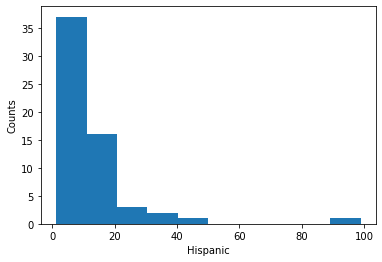

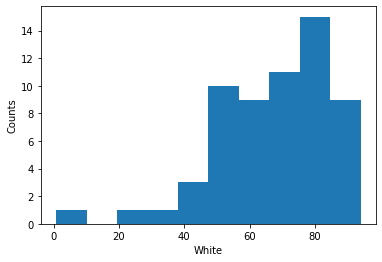

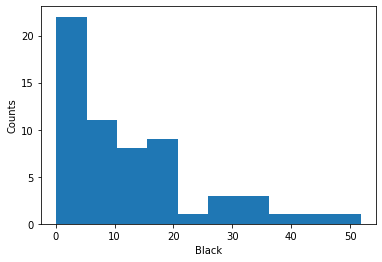

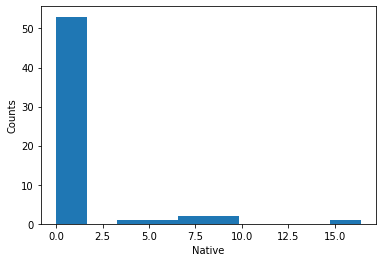

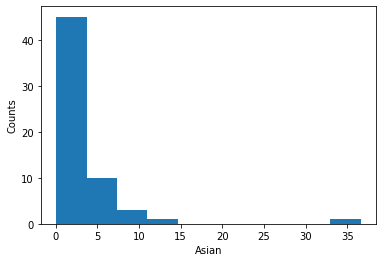

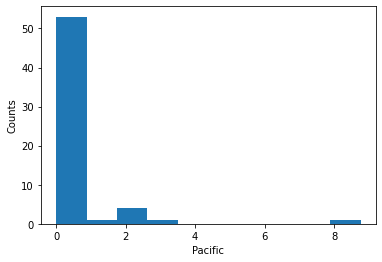

<Figure size 432x288 with 0 Axes>

In [15]:
for col in us_census.columns[3:9]:
    plt.hist(us_census[col])
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()
    plt.clf()